# Assignment 3: Cost-Sensitive Regression


##### Group Members:
1. Kummitha Jhanavi (CS21BTECH11032)
2. Potta Vennela (CS21BTECH11046)
3. Vinjam Aswitha (MA21BTECH11018)
4. Pundi Bindusree (CS21BTECH11048)
5. K Vivek Kumar (CS21BTECH11026)

In [1]:
# Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

In [2]:
# Loading the dataset
data = pd.read_csv('costsensitiveregression.csv')
data.head()

,NotCount,YesCount,ATPM,PFD,PFG,SFD,SFG,WP,WS,AH,AN,Status,FNC
0,2,21,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0
1,23,0,0.0,0.044,0.0,0.0,0.0,0.306179,0.0,0.0,0.0,1,0.0
2,1,22,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0
3,5,18,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1,0.0
4,1,22,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147636 entries, 0 to 147635
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   NotCount  147636 non-null  int64  
 1   YesCount  147636 non-null  int64  
 2   ATPM      147636 non-null  float64
 3   PFD       147636 non-null  float64
 4   PFG       147636 non-null  float64
 5   SFD       147636 non-null  float64
 6   SFG       147636 non-null  float64
 7   WP        147636 non-null  float64
 8   WS        147636 non-null  float64
 9   AH        147636 non-null  float64
 10  AN        147636 non-null  float64
 11  Status    147636 non-null  int64  
 12  FNC       147636 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 14.6 MB


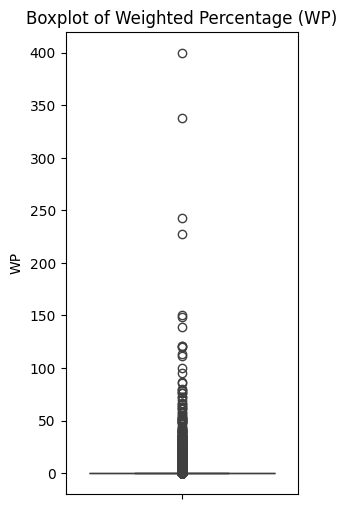

In [4]:
# Create a boxplot to visualize the distribution of the 'WP' (Weighted Percentage) variable
plt.figure(figsize=(3, 6))
sns.boxplot(data=data['WP'], orient='v')
plt.title('Boxplot of Weighted Percentage (WP)')
plt.ylabel('WP')
plt.savefig("a3pd1.png")
plt.show()

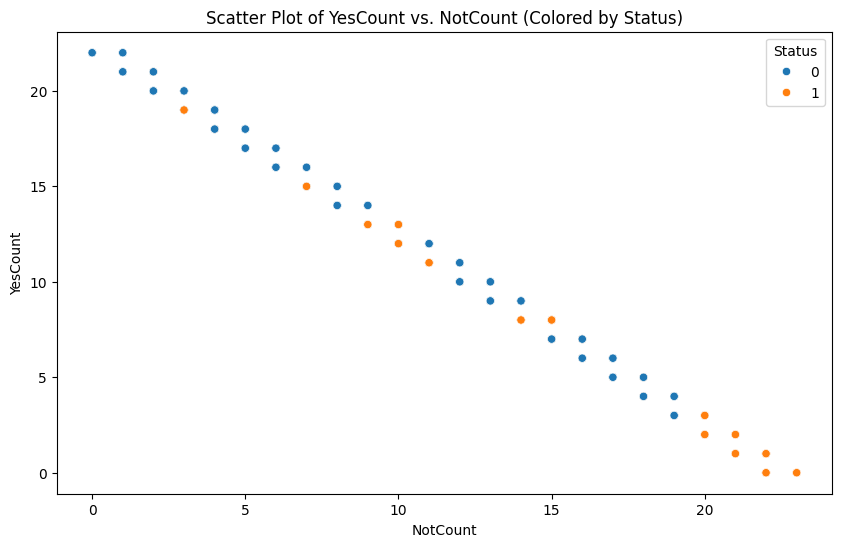

In [5]:
# Create a scatter plot to visualize the relationship between 'NotCount' and 'YesCount', colored by 'Status'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NotCount', y='YesCount', hue='Status', data=data)
plt.title('Scatter Plot of YesCount vs. NotCount (Colored by Status)')
plt.xlabel('NotCount')
plt.ylabel('YesCount')
plt.legend(title='Status')
plt.savefig("a3pd2.png")
plt.show()

In [6]:
# Extracting independent column data
X = data[['NotCount', 'YesCount', 'ATPM', 'PFD', 'PFG', 'SFD', 'SFG', 'WP', 'WS', 'AH', 'AN']]

# Extracting the dependent column data
y = data['Status']

In [7]:
# Initialising seed
np.random.seed(42)

In [8]:
# Extracting the false negatives cost
false_negative_costs = data['FNC']

In [9]:
X_train, X_test, y_train, y_test, FNC_train, FNC_test = train_test_split(X, y, false_negative_costs, test_size=0.2)

In [10]:
# Calculate class weights for cost-sensitive learning
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

## Bahnsen's Approach

In [11]:
# Implement Bahnsen's approach
bahnsen_model = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]}, solver='lbfgs', max_iter=1000)
bahnsen_model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.7128079471797409, 1: 1.6747681574544113},
                   max_iter=1000)

In [12]:
# Predict on test data using Bahnsen's approach
bahnsen_y_pred = bahnsen_model.predict(X_test)

In [13]:
# Evaluate Bahnsen's model performance
bahnsen_accuracy = accuracy_score(y_test, bahnsen_y_pred)
bahnsen_precision = precision_score(y_test, bahnsen_y_pred)
bahnsen_recall = recall_score(y_test, bahnsen_y_pred)

print("Evaluation Metrics for Bahnsen's Approach:")
print("Accuracy:", bahnsen_accuracy)
print("Precision:", bahnsen_precision)
print("Recall:", bahnsen_recall)

Evaluation Metrics for Bahnsen's Approach:
Accuracy: 0.8578298564074777
Precision: 0.737149892274546
Recall: 0.8145334996032196


In [14]:
bahnsen_cm = confusion_matrix(y_test, bahnsen_y_pred)
bahnsen_cr = classification_report(y_test, bahnsen_y_pred)

In [15]:
print("Bahsen's Approach Confusion Matrix is:\n", bahnsen_cm, "\n")
print("Bahsen's Approach Classification Report is:\n", bahnsen_cr)

Bahsen's Approach Confusion Matrix is:
 [[18145  2562]
 [ 1636  7185]] 

Bahsen's Approach Classification Report is:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90     20707
           1       0.74      0.81      0.77      8821

    accuracy                           0.86     29528
   macro avg       0.83      0.85      0.84     29528
weighted avg       0.86      0.86      0.86     29528



## Nikou - Gunnemann's Approach

In [16]:
nikou_gunnemann_model = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]}, solver='lbfgs', max_iter=1000)
nikou_gunnemann_model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.7128079471797409, 1: 1.6747681574544113},
                   max_iter=1000)

In [17]:
nikou_gunnemann_y_pred = nikou_gunnemann_model.predict(X_test)

In [18]:
nikou_gunnemann_cm = confusion_matrix(y_test, nikou_gunnemann_y_pred)
nikou_gunnemann_cr = classification_report(y_test, nikou_gunnemann_y_pred)

In [19]:
print("Nikou-Gunnemann's Approach:")
print("Confusion Matrix:")
print(nikou_gunnemann_cm)
print("\nClassification Report:")
print(nikou_gunnemann_cr)

Nikou-Gunnemann's Approach:
Confusion Matrix:
[[18145  2562]
 [ 1636  7185]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     20707
           1       0.74      0.81      0.77      8821

    accuracy                           0.86     29528
   macro avg       0.83      0.85      0.84     29528
weighted avg       0.86      0.86      0.86     29528

